In [6]:
# Load CSV (using python)
import csv
import numpy as np
import seaborn as sns
import pandas as pd
data_frame = pd.read_csv("D:\Internship Technocolabs\Project 1\Dataset\Test.csv")

data_frame.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
#checking duplicates
duplicates=data_frame.duplicated()
print(duplicates.sum())
data_frame[duplicates]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [8]:
#checking info

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
#checking shape

data_frame.shape

(5681, 11)

In [5]:
data_frame.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
#checking null values

data_frame.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
#removing nulls using medium and mode techniques

median1=data_frame['Item_Weight'].median()

data_frame['Item_Weight'].replace(np.nan,median1,inplace=True)

mode1=data_frame['Outlet_Size'].mode().values[0]

data_frame['Outlet_Size']=data_frame['Outlet_Size'].replace(np.nan,mode1)

In [8]:
data_frame.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.662023,0.065684,141.023273,1997.828903
std,4.245831,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


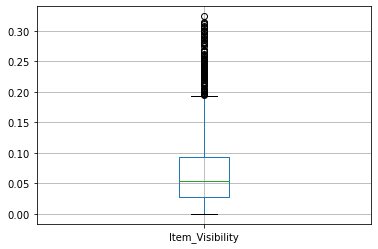

In [13]:
import matplotlib.pyplot as plt
data_frame.boxplot(column=['Item_Visibility'])
plt.show()

In [14]:
#def remove_outlier

def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1 - (1.5 * IQR)
    upper_range=q3 + (1.5 * IQR)
    return lower_range, upper_range

In [15]:
low,up=remove_outlier(data_frame['Item_Visibility'])
data_frame['Item_Visibility']=np.where(data_frame['Item_Visibility']>up,up,data_frame['Item_Visibility'])
data_frame['Item_Visibility']=np.where(data_frame['Item_Visibility']<low,low,data_frame['Item_Visibility'])

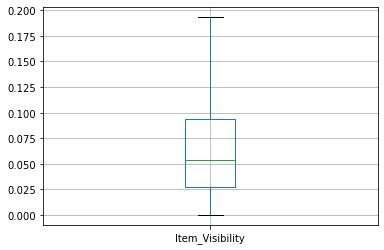

In [12]:
#after removing outliers
data_frame.boxplot(column=['Item_Visibility'])
plt.show()

In [16]:
training_data=pd.read_csv("D:\Internship Technocolabs\Project 1\Dataset\Train.csv")
training_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
#checking duplicates
duplicate=training_data.duplicated()
print(duplicate.sum())
training_data[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [19]:
#checking shape

training_data.shape

(8523, 12)

In [20]:
training_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
#checking null values

training_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
#removing nulls using medium and mode techniques

median1=training_data['Item_Weight'].median()

training_data['Item_Weight'].replace(np.nan,median1,inplace=True)

mode1=training_data['Outlet_Size'].mode().values[0]

training_data['Outlet_Size']=training_data['Outlet_Size'].replace(np.nan,mode1)

In [23]:
training_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
training_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


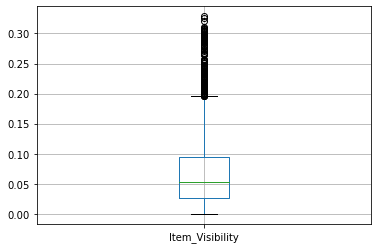

In [25]:
training_data.boxplot(column=['Item_Visibility'])
plt.show()

In [26]:
low,up=remove_outlier(training_data['Item_Visibility'])
training_data['Item_Visibility']=np.where(training_data['Item_Visibility']>up,up,training_data['Item_Visibility'])
training_data['Item_Visibility']=np.where(training_data['Item_Visibility']<low,low,training_data['Item_Visibility'])

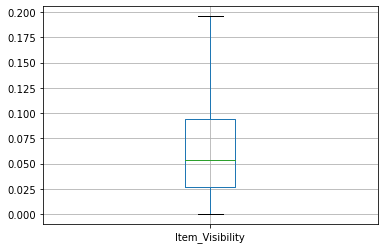

In [27]:
#after removing outliers
training_data.boxplot(column=['Item_Visibility'])
plt.show()

# EDA

In [28]:
categorical = training_data.select_dtypes(include =[object])
print(categorical.shape[1],"Categorical Shape")
categorical.columns

7 Categorical Shape


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# 1. Item_Fat_Content

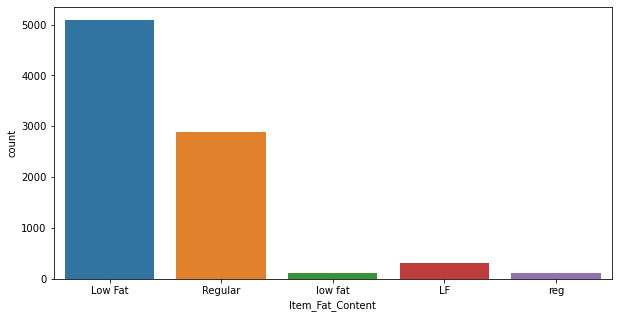

In [29]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data= training_data, x='Item_Fat_Content')
plt.show()

## Categorical Analysis

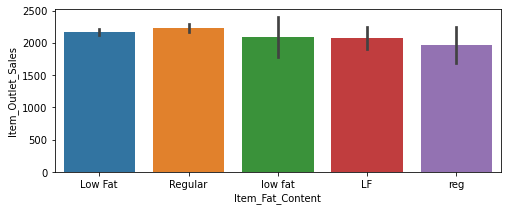

In [30]:
plt.figure(figsize=(8,3))
sns.barplot(data=training_data, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.show()

## Observation
The purchased items predominantly consist of low-fat products, but the sales figures for both low-fat and regular items are nearly equal in the outlets.

# 2. Item_Type

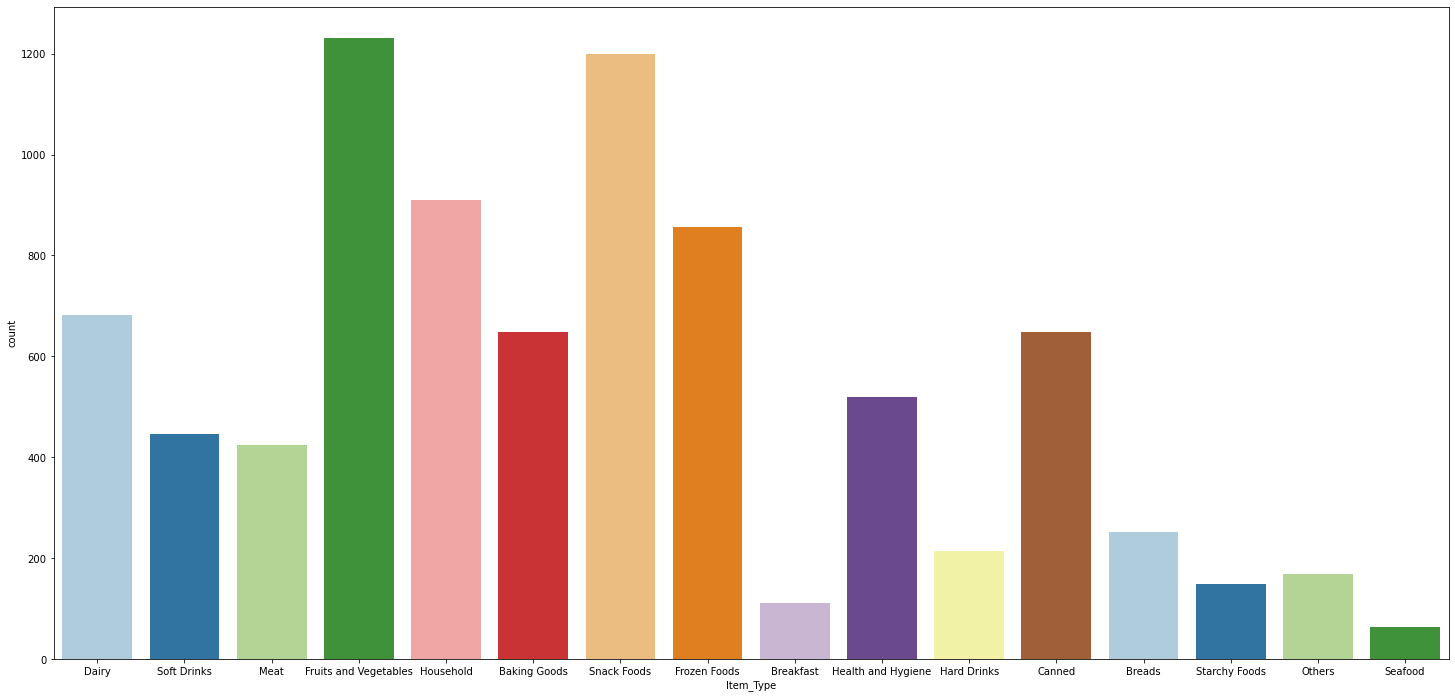

In [31]:
plt.figure(figsize=(25,12))

sns.countplot(data=training_data, x='Item_Type', palette='Paired', orient="h")

plt.show()

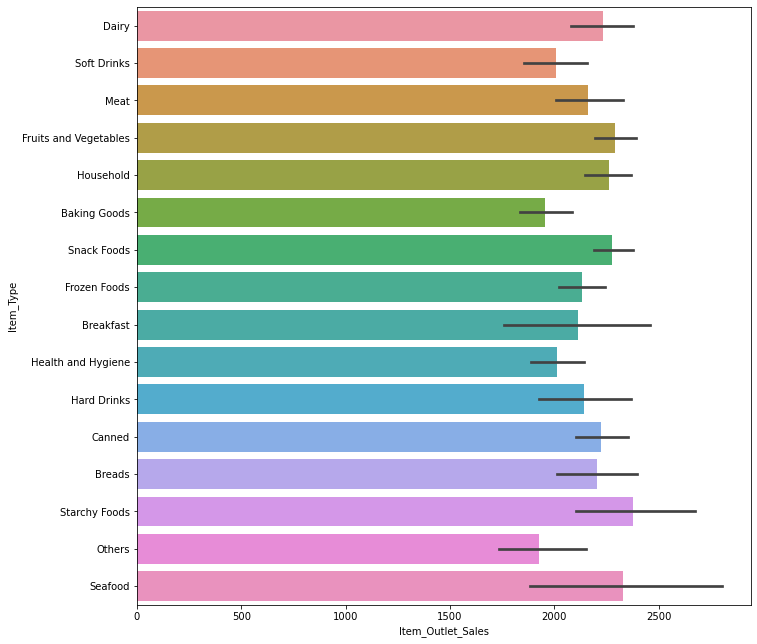

In [32]:
plt.figure(figsize=(11,11))
sns.barplot(data=training_data, y='Item_Type', x='Item_Outlet_Sales')

plt.show()

## Observation
Although fruits, vegetables, and snack foods were offered, it appears that seafood and starchy foods had higher sales. To enhance sales, it would be beneficial to stock more of the products that are frequently purchased by customers.

# 3. Outlet_Size

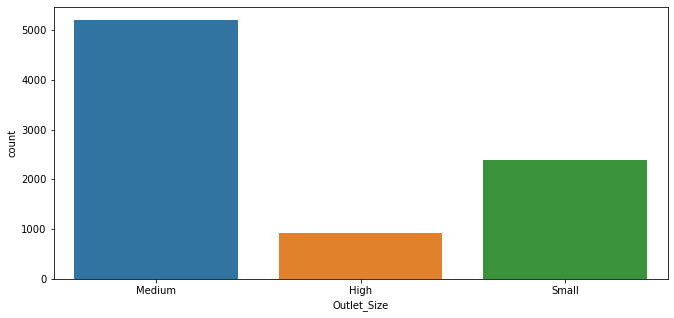

In [33]:
plt.figure(figsize=(11,5))
sns.countplot(data=training_data, x='Outlet_Size')

plt.show()

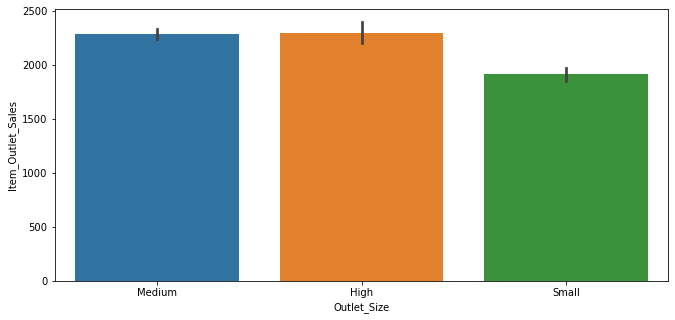

In [34]:
plt.figure(figsize=(11,5))
sns.barplot(data=training_data, x='Outlet_Size', y='Item_Outlet_Sales')

plt.show()

## Observations
The outlets primarily consist of medium-sized establishments. However, the sales figures indicate that medium and high-sized outlets generate the highest sales. Therefore, increasing the number of high-sized outlets may help improve overall outlet sales.

# 4. Outlet_Location_Type

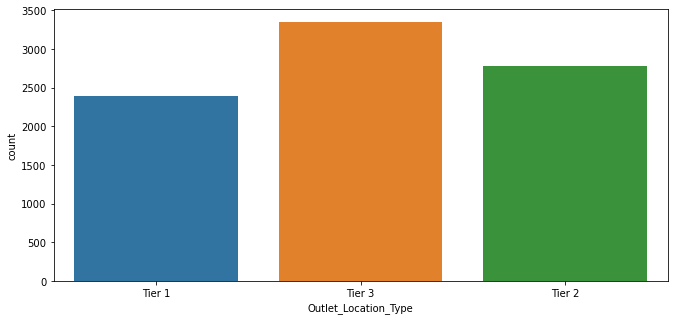

In [35]:
plt.figure(figsize=(11,5))
sns.countplot(data=training_data, x='Outlet_Location_Type')

plt.show()

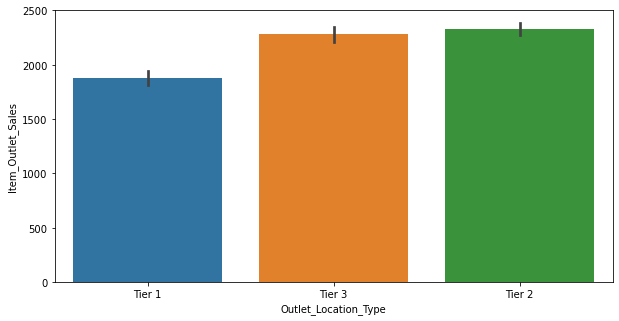

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=training_data, x='Outlet_Location_Type', y='Item_Outlet_Sales')

plt.show()
            

## Observations
Outlet sales are typically high in Tier 3 and Tier 2 location types. Interestingly, the majority of our outlets are located in Tier 3 locations.

# 5. Outlet_Type

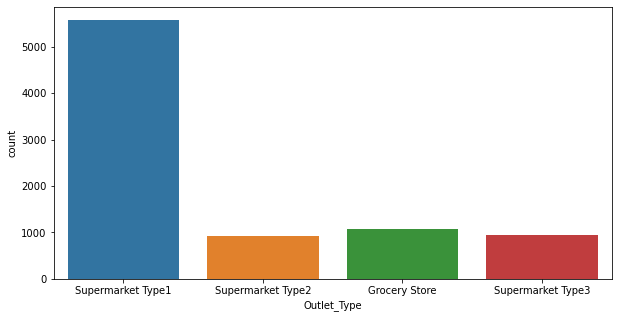

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=training_data, x='Outlet_Type')

plt.show()

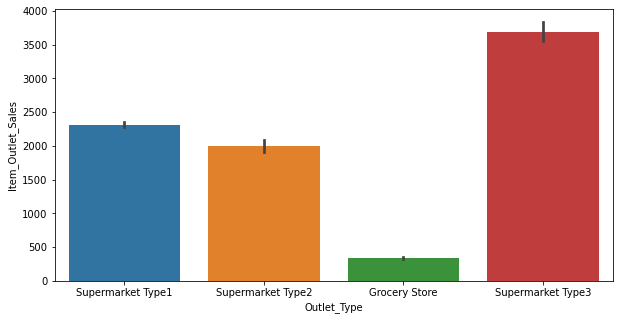

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(data=training_data, x='Outlet_Type', y='Item_Outlet_Sales')

plt.show()

## Observations
While the majority of our outlets are classified as Supermarket Type 1, it is noteworthy that sales are higher for Type 3 supermarkets.

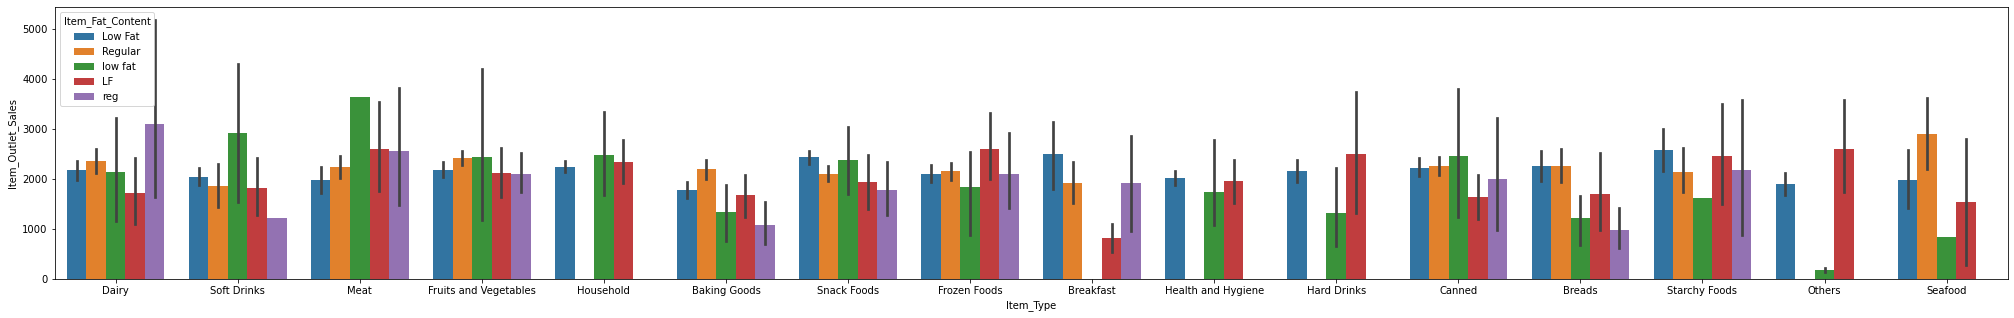

In [39]:
plt.figure(figsize=(35,5))
sns.barplot(data=training_data, x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content')
plt.show()

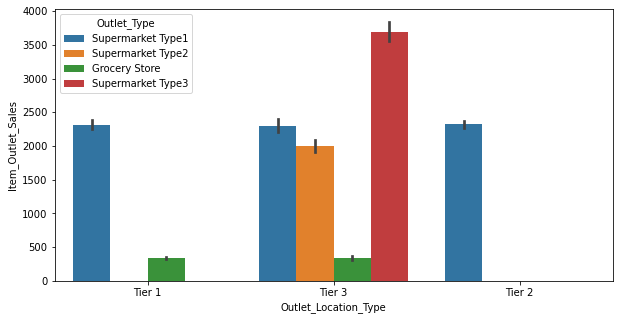

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(data=training_data, x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type')

plt.show()

## Observations
Tier-3 location types encompass all types of outlet categories and exhibit a significant margin of high sales.

## Analysis on Numerical Features

In [41]:
# Selecting only numerical columns
num_cols = training_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Printing the numerical column names
print("Numerical features: ")
num_cols

Numerical features: 


['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

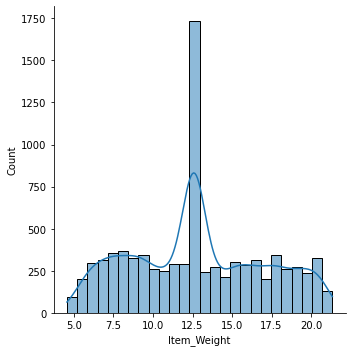

In [42]:
sns.displot(data=training_data, x=training_data.Item_Weight, kde=True)
plt.show(1)

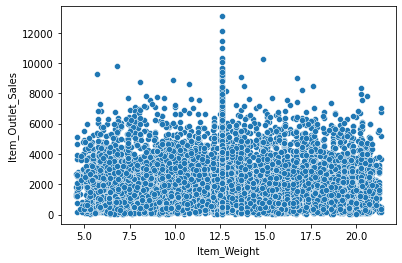

In [43]:
sns.scatterplot(data=training_data, x='Item_Weight', y='Item_Outlet_Sales')
plt.show(1)

In [44]:
print("Min: ",training_data.Item_Visibility.min())

print("Mean: ",training_data['Item_Visibility'].mean())

print("Median: ",training_data['Item_Visibility'].median())

print("Mode: ",training_data['Item_Visibility'].mode())

Min:  0.0
Mean:  0.065306993889241
Median:  0.053930934
Mode:  0    0.0
Name: Item_Visibility, dtype: float64


To address the missing information and account for outliers, the visibility of the product can be imputed using the median value.

In [45]:
training_data['Item_Visibility']=training_data['Item_Visibility'].replace(0, training_data['Item_Visibility'].median())
data_frame ['Item_Visibility']=data_frame ['Item_Visibility'].replace(0,data_frame ['Item_Visibility'].median())

In [46]:
training_data.Item_Visibility.min()

0.003574698

Observing the current data, it is evident that visibility is not precisely zero but rather has a non-zero value, indicating that the item is seldom purchased by customers.

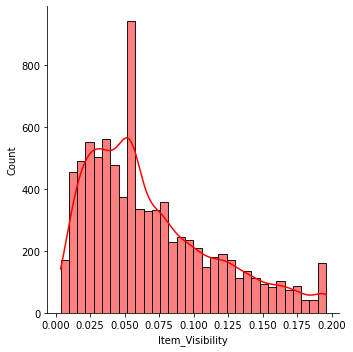

In [47]:
sns.displot(x=training_data.Item_Visibility, color='red', kde=True)
plt.show()

## Observation
A significant portion of items falls within the visibility range of 0 to 0.2, with the highest frequency occurring around 0.05. Interestingly, items within this visibility range also exhibit higher sales. This distribution of visibility values shows a positive skewness.

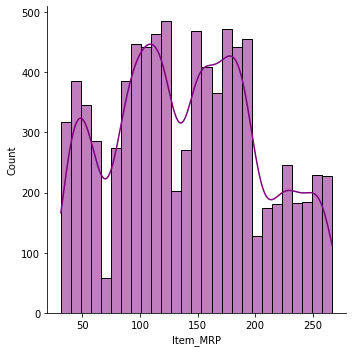

In [48]:
sns.displot(x=training_data.Item_MRP, color='purple', kde=True)
plt.show()

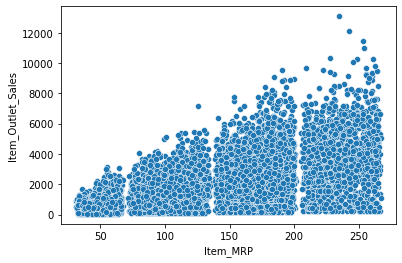

In [49]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=training_data)
plt.show()

## Observations
There is a considerable inventory of products priced at 50 MRP, 100 MRP, and 180 MRP. However, it is noteworthy that products within the price range of 200-250 dollars demonstrate higher sales.

In [50]:
training_data['Years_Established'] =training_data['Outlet_Establishment_Year'].apply(lambda x: 2023 - x) 
data_frame ['Years_Established'] = data_frame ['Outlet_Establishment_Year'].apply(lambda x: 2023 - x)

This code adds two additional columns, 'Years_Established', to the 'train' and 'test' datasets. The values in these new columns are computed by subtracting the 'Outlet_Establishment_Year' column from the year 2023. This calculation provides the number of years each outlet has been in operation.

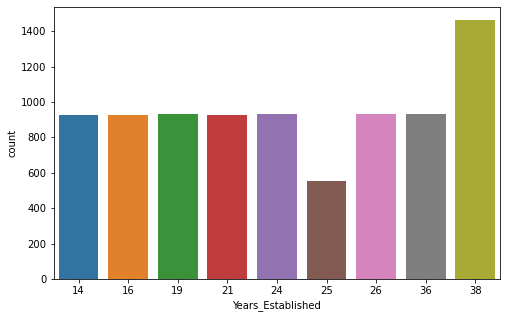

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years_Established',data=training_data,palette='tab10')
plt.show()

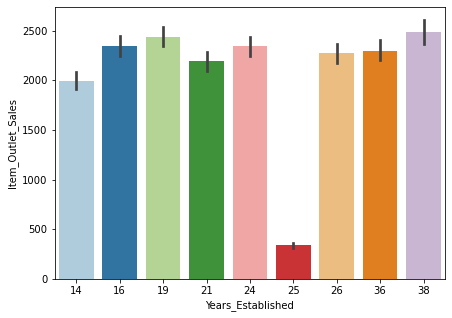

In [52]:
plt.figure(figsize=(7,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales', data=training_data, palette='Paired')
plt.show()

## Observations
The data clearly indicates that outlets established 36 years ago have a significant sales margin. However, it is important to note that an outlet established 23 years ago has the lowest sales margin. This suggests that the number of years an outlet has been established does not necessarily guarantee improved sales unless the products are aligned with customer preferences and interests.

In [53]:
training_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


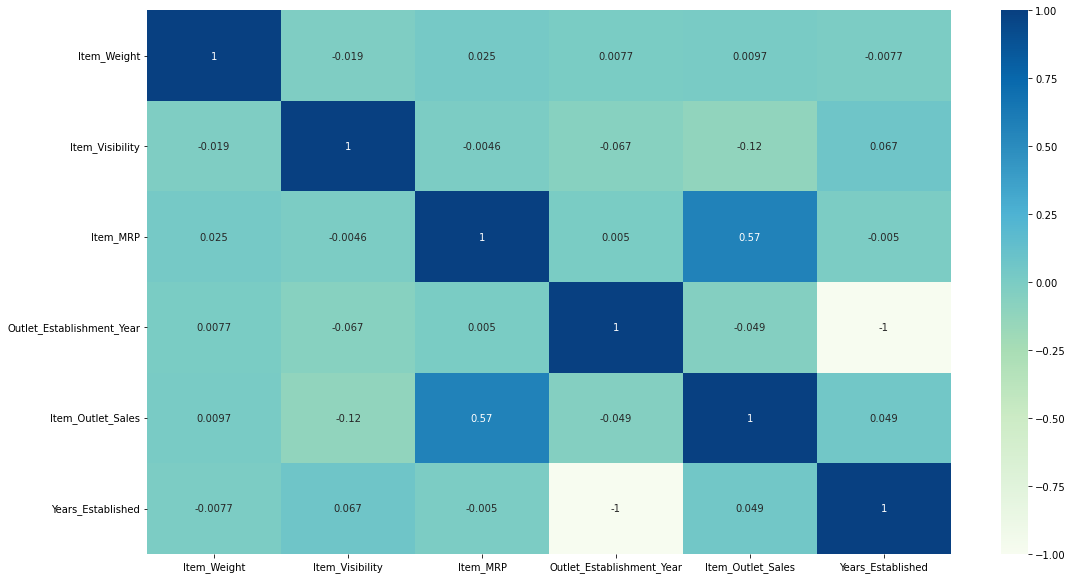

In [54]:
plt.figure(figsize=(18,10))
sns.heatmap(training_data.corr() ,cmap='GnBu', annot=True)
plt.show()

## Pre-Processing the Dataset
Eliminate the skewness.

In [55]:
training_data.Item_Visibility.describe()

count    8523.000000
mean        0.068635
std         0.046034
min         0.003575
25%         0.033085
50%         0.053931
75%         0.094585
max         0.195979
Name: Item_Visibility, dtype: float64

In [56]:
training_data.Item_Visibility = training_data.Item_Visibility.apply(np.log1p)

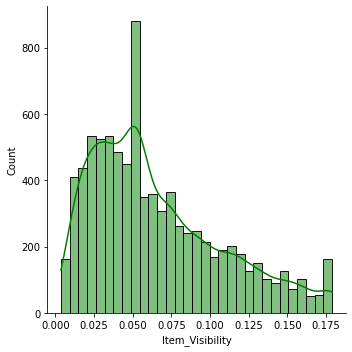

In [57]:
sns.displot(x=training_data.Item_Visibility, color='green', kde=True)
plt.show()

In [58]:
training_data.Item_Visibility.describe()

count    8523.000000
mean        0.065477
std         0.042305
min         0.003568
25%         0.032550
50%         0.052527
75%         0.090376
max         0.178965
Name: Item_Visibility, dtype: float64

## Feature Engineering

In [59]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical variables in the training dataset
for i in categorical.columns:
   training_data[i] = le.fit_transform(training_data[i])
    
# Encode categorical variables in the testing dataset
for i in categorical.columns:
   data_frame[i] = le.fit_transform(data_frame[i])

In [60]:
training_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,1,0.015920,4,249.8092,9,1999,1,0,1,3735.1380,24
1,8,5.92,2,0.019095,14,48.2692,3,2009,1,2,2,443.4228,14
2,662,17.50,1,0.016621,10,141.6180,9,1999,1,0,1,2097.2700,24
3,1121,19.20,2,0.052527,6,182.0950,0,1998,1,2,0,732.3800,25
4,1297,8.93,1,0.052527,9,53.8614,1,1987,0,2,1,994.7052,36


There is a strong positive correlation between Item_MRP and Item_Outlet_Sales, indicating that as the Item_MRP increases, the Item_Outlet_Sales also tends to increase.

## Train Test Split

In [61]:
training_data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,1,0.015920,4,249.8092,9,1999,1,0,1,3735.1380,24
1,8,5.92,2,0.019095,14,48.2692,3,2009,1,2,2,443.4228,14
2,662,17.50,1,0.016621,10,141.6180,9,1999,1,0,1,2097.2700,24


In [62]:
X = training_data.drop('Item_Outlet_Sales', axis=1)
y = training_data['Item_Outlet_Sales']

X.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,156,9.30,1,0.015920,4,249.8092,9,1999,1,0,1,24
1,8,5.92,2,0.019095,14,48.2692,3,2009,1,2,2,14
2,662,17.50,1,0.016621,10,141.6180,9,1999,1,0,1,24


In [63]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [65]:
X.shape, y.shape

((8523, 12), (8523,))

In [66]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((6818, 12), (1705, 12), (1705,), (6818,))

In [67]:
import statsmodels.api as sm

# Create a linear regression model and fit it to the data
Lreg_model = sm.OLS(y_train, X_train)
results = Lreg_model.fit()

# Print the regression coefficients and other statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     655.7
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:43:35   Log-Likelihood:                -57940.
No. Observations:                6818   AIC:                         1.159e+05
Df Residuals:                    6806   BIC:                         1.160e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Item_Identifier       

In [68]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# create a Lasso model and fit it to the training data
lasso_model = Lasso(alpha=0.1) # set the regularization strength
lasso_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = lasso_model.predict(X_test)

# calculate the mean squared error and R-squared for the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the model coefficients and other statistics
print("Lasso Regression Report\n")
print("Model coefficients:")
print(lasso_model.coef_)
print("\nModel intercept:")
print(lasso_model.intercept_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Lasso Regression Report

Model coefficients:
[ 1.25481537e-02 -9.44428014e-01  4.12070976e+01 -1.26729918e+03
 -7.25839561e-01  1.56474089e+01  6.12592009e+01 -1.29478834e+01
 -3.59526109e+02 -2.27712071e+02  8.81704807e+02 -1.37362141e+01]

Model intercept:
25547.645769301533

Model performance:
Mean squared error: 1500300.18
R-squared: 0.49


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# create a Random Forest model and fit it to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=100)
rf_model.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_model.predict(X_test)

# calculate the mean squared error and R-squared for the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the model feature importances and other statistics
print("Random Forest Regression Report\n")
print("Feature importances:")
print(rf_model.feature_importances_)
print("\nModel performance:")
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Random Forest Regression Report

Feature importances:
[0.06616096 0.04284582 0.01363408 0.08829618 0.0321237  0.43432079
 0.01538352 0.02342755 0.00738551 0.00578801 0.22674605 0.04388785]

Model performance:
Mean squared error: 1331132.14
R-squared: 0.55


In [70]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=100)
xgb_model.fit(X_train, y_train)

# Predict on the test set and calculate metrics
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the report
print("XGBoost Regression Report\n")
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

XGBoost Regression Report

Mean squared error: 1435015.84
R-squared: 0.51


In [71]:
import pickle

# save the trained model in a file
with open('xgb_models.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)